# Porównanie

In [1]:
import pandas as pd
import lightgbm as lgbm
import mlflow
from xgboost import XGBClassifier

from sklearnex import patch_sklearn
patch_sklearn()

import numpy as np
import matplotlib.pyplot as plt
import pickle
import shap
import os
import math
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, f1_score, RocCurveDisplay, roc_auc_score
from sklearn.calibration import CalibrationDisplay
from sklearn.preprocessing import StandardScaler

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Początkowe Zmienne

In [2]:
def load_pickle(path):
    with open(path, "rb") as handle:
        model = pickle.load(handle)
    return model

In [3]:
test_begin = pd.read_parquet("data/states_prepared_test.parquet")
test_begin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620392 entries, 0 to 620391
Columns: 108 entries, filename to bombsite_not_planted
dtypes: float64(9), int32(7), int64(76), object(6), uint8(10)
memory usage: 453.2+ MB


In [4]:
def select_beg_feat(prep_df):
    columns = [
        'seconds', 'ctAlivePlayers', 'ctEqVal', 'tAlivePlayers', 'tEqVal',
       'ct_armor', 't_armor', 'ct_hp', 't_hp', 'ct_hasHelmet', 't_hasHelmet', 'ct_DecoyGrenade',
       't_DecoyGrenade', 'ct_Flashbang', 't_Flashbang', 'ct_HEGrenade',
       't_HEGrenade', 'ct_SmokeGrenade', 't_SmokeGrenade', 'ct_fireGrenades',
       't_fireGrenades', 'ct_isBlinded', 't_isBlinded', 'ct_hasDefuse',
       't_hasBomb', 'ct_isDefusing', 't_isPlanting', 'ct_spottedPlayers',
       't_spottedPlayers', 'ct_activeWeapon_Pistol',
       'ct_activeWeapon_EnhancedPistols', 'ct_activeWeapon_Deagle',
       'ct_activeWeapon_SMG', 'ct_activeWeapon_WeakAssaultRifle',
       'ct_activeWeapon_LunetRifle', 'ct_activeWeapon_SniperRifle',
       'ct_activeWeapon_AssaultRifle', 'ct_activeWeapon_Others',
       't_activeWeapon_Pistol', 't_activeWeapon_EnhancedPistols',
       't_activeWeapon_Deagle', 't_activeWeapon_SMG',
       't_activeWeapon_WeakAssaultRifle', 't_activeWeapon_LunetRifle',
       't_activeWeapon_SniperRifle', 't_activeWeapon_AssaultRifle',
       't_activeWeapon_Others', 'ct_mainWeapon_Pistol',
       'ct_mainWeapon_EnhancedPistols', 'ct_mainWeapon_Deagle',
       'ct_mainWeapon_SMG', 'ct_mainWeapon_WeakAssaultRifle',
       'ct_mainWeapon_LunetRifle', 'ct_mainWeapon_SniperRifle',
       'ct_mainWeapon_AssaultRifle', 'ct_mainWeapon_Others',
       't_mainWeapon_Pistol', 't_mainWeapon_EnhancedPistols',
       't_mainWeapon_Deagle', 't_mainWeapon_SMG',
       't_mainWeapon_WeakAssaultRifle', 't_mainWeapon_LunetRifle',
       't_mainWeapon_SniperRifle', 't_mainWeapon_AssaultRifle',
       't_mainWeapon_Others', 'ct_secondaryWeapon_Pistol',
       'ct_secondaryWeapon_EnhancedPistols', 'ct_secondaryWeapon_Deagle',
       't_secondaryWeapon_Pistol', 't_secondaryWeapon_EnhancedPistols',
       't_secondaryWeapon_Deagle', 'ctMinDistToA',
       'ctMinDistToB', 'tMinDistToA', 'tMinDistToB', 'ctMeanDistToA',
       'ctMeanDistToB', 'tMeanDistToA', 'tMeanDistToB', 'de_ancient',
       'de_dust2', 'de_inferno', 'de_mirage', 'de_nuke', 'de_overpass',
       'de_vertigo','bombsite_A', 'bombsite_B', 'bombsite_not_planted'
    ]
    return prep_df[columns]

test_frame_begin_variables = select_beg_feat(test_begin)
target = test_begin['winningSideCT']
test_frame_begin_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620392 entries, 0 to 620391
Data columns (total 89 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   seconds                             620392 non-null  float64
 1   ctAlivePlayers                      620392 non-null  int64  
 2   ctEqVal                             620392 non-null  int64  
 3   tAlivePlayers                       620392 non-null  int64  
 4   tEqVal                              620392 non-null  int64  
 5   ct_armor                            620392 non-null  int64  
 6   t_armor                             620392 non-null  int64  
 7   ct_hp                               620392 non-null  int64  
 8   t_hp                                620392 non-null  int64  
 9   ct_hasHelmet                        620392 non-null  int64  
 10  t_hasHelmet                         620392 non-null  int64  
 11  ct_DecoyGrenade           

In [5]:
begin_variables = {
    "XGB":{
        "path": r"E:/Studia/Inzynierka/csgo-analysis/notebooks/mlruns/1/9f6bb1a1e0d74e6ca465b67d6ac76827/artifacts/model/model.pkl"
    },
    "LGBM": {
        "path": r"E:/Studia/Inzynierka/csgo-analysis/notebooks/mlruns/1/14cd7a9589ce483db318cd4c3aaa6c5a/artifacts/model/model.pkl"
    }
}
results_beg = {}
for model in begin_variables:
    print(model)
    path = begin_variables[model]["path"]
    model_loaded = load_pickle(path)
    y_predict = model_loaded.predict_proba(test_frame_begin_variables)[:, 1]
    results_beg[model] = y_predict

results_beg

XGB
LGBM


{'XGB': array([0.52129936, 0.52129936, 0.52129936, ..., 0.02567062, 0.02567062,
        0.02567062], dtype=float32),
 'LGBM': array([0.50897676, 0.50897676, 0.50897676, ..., 0.03497649, 0.03497649,
        0.03407121])}

## ESTA

In [6]:
test_all_variables = pd.read_parquet("data/states_another_mod_test.parquet")
test_all_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620392 entries, 0 to 620391
Columns: 108 entries, filename to bombsite_not_planted
dtypes: float64(17), int32(7), int64(68), object(6), uint8(10)
memory usage: 457.9+ MB


In [7]:
def select_feat(prep_df):
    columns = [
        'seconds', 'ctAlivePlayers', 'ctEqVal', 'tAlivePlayers', 'tEqVal',
       'ct_armor', 't_armor', 'ct_hp', 't_hp', 'ct_hasHelmet', 't_hasHelmet', 'ct_DecoyGrenade',
       't_DecoyGrenade', 'ct_Flashbang', 't_Flashbang', 'ct_HEGrenade',
       't_HEGrenade', 'ct_SmokeGrenade', 't_SmokeGrenade', 'ct_fireGrenades',
       't_fireGrenades', 'ct_isBlinded', 't_isBlinded', 'ct_hasDefuse',
       't_hasBomb', 'ct_isDefusing', 't_isPlanting', 'ct_spottedPlayers',
       't_spottedPlayers', 'ct_grouppedPlayers',
       'ct_meanDist', 'ct_minDist', 't_meanDist','t_minDist',
       't_grouppedPlayers', 'ct_conquerMap', 't_conquerMap', 'ct_activeWeapon_Pistol',
       'ct_activeWeapon_EnhancedPistols', 'ct_activeWeapon_Deagle',
       'ct_activeWeapon_SMG', 'ct_activeWeapon_WeakAssaultRifle',
       'ct_activeWeapon_LunetRifle', 'ct_activeWeapon_SniperRifle',
       'ct_activeWeapon_AssaultRifle', 'ct_activeWeapon_Others',
       't_activeWeapon_Pistol', 't_activeWeapon_EnhancedPistols',
       't_activeWeapon_Deagle', 't_activeWeapon_SMG',
       't_activeWeapon_WeakAssaultRifle', 't_activeWeapon_LunetRifle',
       't_activeWeapon_SniperRifle', 't_activeWeapon_AssaultRifle',
       't_activeWeapon_Others', 'ct_mainWeapon_Pistol',
       'ct_mainWeapon_EnhancedPistols', 'ct_mainWeapon_Deagle',
       'ct_mainWeapon_SMG', 'ct_mainWeapon_WeakAssaultRifle',
       'ct_mainWeapon_LunetRifle', 'ct_mainWeapon_SniperRifle',
       'ct_mainWeapon_AssaultRifle', 't_mainWeapon_Pistol', 't_mainWeapon_EnhancedPistols',
       't_mainWeapon_Deagle', 't_mainWeapon_SMG',
       't_mainWeapon_WeakAssaultRifle', 't_mainWeapon_LunetRifle',
       't_mainWeapon_SniperRifle', 't_mainWeapon_AssaultRifle', 
       'ct_secondaryWeapon_Pistol','ct_secondaryWeapon_EnhancedPistols', 'ct_secondaryWeapon_Deagle',
       't_secondaryWeapon_Pistol', 't_secondaryWeapon_EnhancedPistols',
       't_secondaryWeapon_Deagle', 'ctMinDistToA',
       'ctMinDistToB', 'tMinDistToA', 'tMinDistToB', 'ctMeanDistToA',
       'ctMeanDistToB', 'tMeanDistToA', 'tMeanDistToB', 'ctMeanKills',
       'tMeanKills', 'tScore', 'ctScore', 'de_ancient', 
       'de_dust2', 'de_inferno', 'de_mirage', 'de_nuke', 'de_overpass',
       'de_vertigo','bombsite_A', 'bombsite_B', 'bombsite_not_planted'
    ]
    return prep_df[columns]

test_frame_all_variables = select_feat(test_all_variables)
test_frame_all_variables.info()
target = test_all_variables['winningSideCT']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620392 entries, 0 to 620391
Data columns (total 99 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   seconds                             620392 non-null  float64
 1   ctAlivePlayers                      620392 non-null  int64  
 2   ctEqVal                             620392 non-null  int64  
 3   tAlivePlayers                       620392 non-null  int64  
 4   tEqVal                              620392 non-null  int64  
 5   ct_armor                            620392 non-null  int64  
 6   t_armor                             620392 non-null  int64  
 7   ct_hp                               620392 non-null  int64  
 8   t_hp                                620392 non-null  int64  
 9   ct_hasHelmet                        620392 non-null  int64  
 10  t_hasHelmet                         620392 non-null  int64  
 11  ct_DecoyGrenade           

In [8]:
all_variables = {
    "LGBM": {
        "path": r"E:/Studia/Inzynierka/csgo-analysis/notebooks/mlruns/1/c7d0c2a0e20d4a0eb2ec20711984942a/artifacts/model/model.pkl"
    }
}

results_all = {}
for model in all_variables:
    print(model)
    path = all_variables[model]["path"]
    model_loaded = load_pickle(path)
    y_predict = model_loaded.predict_proba(test_frame_all_variables)[:, 1]
    results_all[model] = y_predict
results_all

LGBM


{'LGBM': array([0.48984944, 0.48984944, 0.48984944, ..., 0.02672606, 0.02672606,
        0.02672606])}

## Tabela

In [9]:
past = test_all_variables['filename'].str.startswith("IEM-Katowice")
future = test_all_variables['filename'].str.startswith("BLAST-Premier-Spring-Final-2022")
past.value_counts(), future.value_counts()

(True     321041
 False    299351
 Name: filename, dtype: int64,
 False    321041
 True     299351
 Name: filename, dtype: int64)

In [10]:
index = []
results = []
y_true = test_all_variables['winningSideCT']
for key in results_all:
    index.append(f"{key} (All Variables)")
    y_pred = results_all[key]
    results.append({
        "LogLoss (all)": log_loss(y_true, y_pred),
        "LogLoss (future)": log_loss(y_true[future], y_pred[future]),
        "LogLoss (past)": log_loss(y_true[past], y_pred[past]),
        "AUC-ROC (all)": roc_auc_score(y_true, y_pred),
        "AUC-ROC (future)": roc_auc_score(y_true[future], y_pred[future]),
        "AUC-ROC (past)": roc_auc_score(y_true[past], y_pred[past])
    })
    
y_true = test_begin['winningSideCT']
for key in results_beg:
    index.append(f"{key} (Start Variables)")
    y_pred = results_beg[key]
    results.append({
        "LogLoss (all)": log_loss(y_true, y_pred),
        "LogLoss (future)": log_loss(y_true[future], y_pred[future]),
        "LogLoss (past)": log_loss(y_true[past], y_pred[past]),
        "AUC-ROC (all)": roc_auc_score(y_true, y_pred),
        "AUC-ROC (future)": roc_auc_score(y_true[future], y_pred[future]),
        "AUC-ROC (past)": roc_auc_score(y_true[past], y_pred[past])
    })

results_df = pd.DataFrame.from_records(index=index, data=results)
results_df

,LogLoss (all),LogLoss (future),LogLoss (past),AUC-ROC (all),AUC-ROC (future),AUC-ROC (past)
LGBM (All Variables),0.458763,0.458030,0.459448,0.854431,0.856265,0.852245
XGB (Start Variables),0.460579,0.459372,0.461704,0.853083,0.857024,0.848840
LGBM (Start Variables),0.458841,0.456802,0.460743,0.853767,0.857933,0.849219


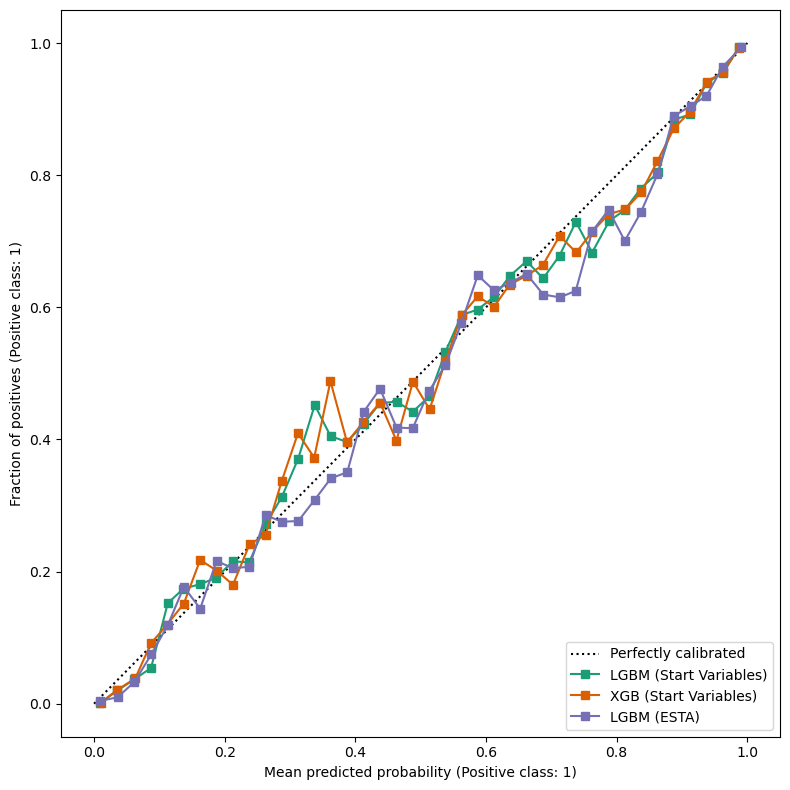

In [11]:
model_list = [
    ("LGBM (Start Variables)", test_begin['winningSideCT'], results_beg["LGBM"]),
    ("XGB (Start Variables)", test_begin['winningSideCT'], results_beg["XGB"]),
    ("LGBM (ESTA)", test_all_variables['winningSideCT'], results_all["LGBM"]),
]

colors = plt.cm.get_cmap("Dark2")
fig, axes = plt.subplots(figsize=(8, 8))

for i, (name, y_true, y_pred) in enumerate(model_list):
    display = CalibrationDisplay.from_predictions(
        y_true,
        y_pred,
        n_bins=40,
        name=name,
        ax=axes,
        color=colors(i),
    )
plt.tight_layout()
plt.savefig("graphs/calibration_curve.png")
plt.show()

# Najlepszy model

## Istotność zmiennych

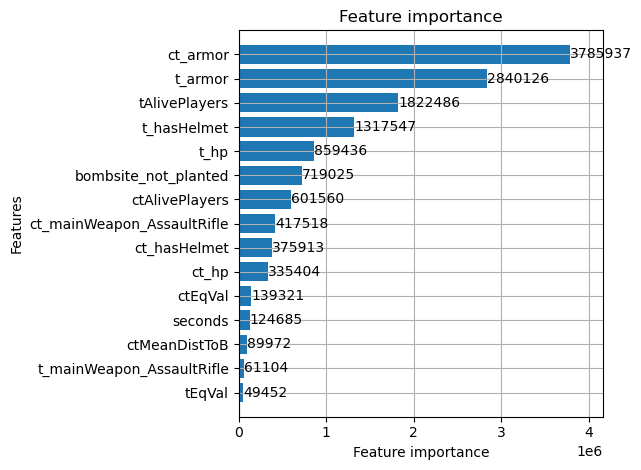

In [12]:
model_lgbm = load_pickle(all_variables["LGBM"]["path"])
lgbm.plot_importance(model_lgbm, importance_type="gain", height=0.8, max_num_features=15, precision=0)
plt.tight_layout()
plt.savefig("graphs/variable_importance_2.png")
plt.show()

In [13]:
explainer = shap.TreeExplainer(model_lgbm)
shap_values = explainer(test_frame_all_variables)

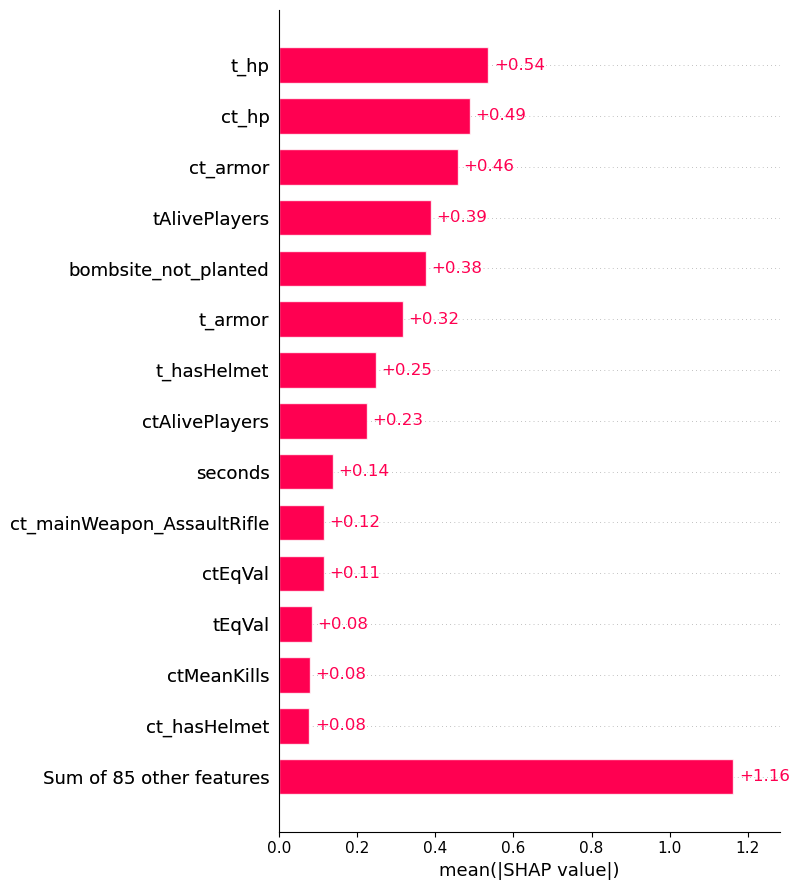

In [14]:
shap.plots.bar(shap_values[:, :, 1], show=False, max_display=15)
plt.tight_layout()
plt.savefig("graphs/variable_importance.png")
plt.show()

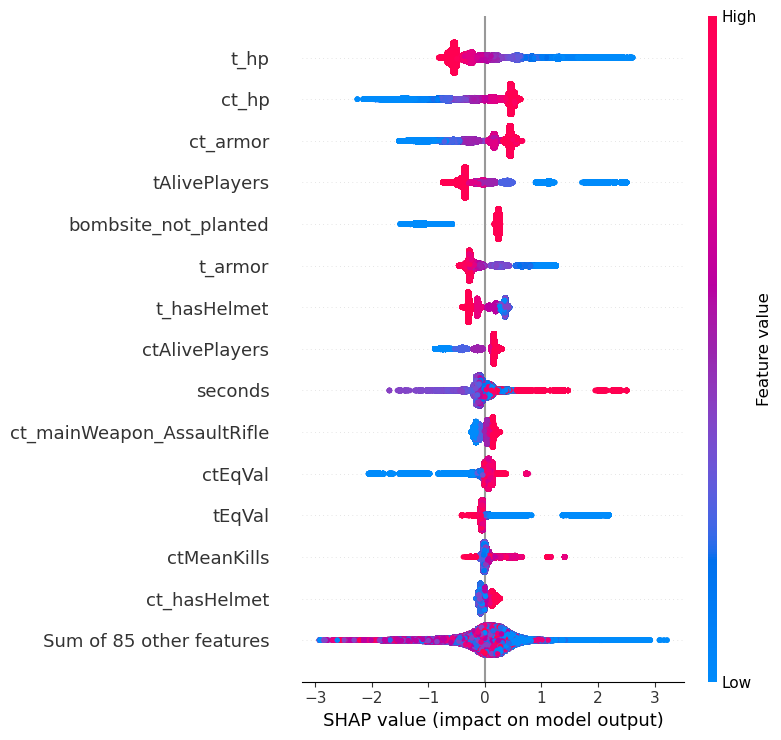

In [15]:
shap.plots.beeswarm(shap_values[:, :, 1], show=False, max_display=15)
plt.tight_layout()
plt.savefig("graphs/variable_importance_values.png")
plt.show()

In [16]:
temp = test_all_variables[["matchID", "roundNum", "seconds"]].groupby(["matchID", "roundNum"])\
        .agg(id_max=('seconds', 'idxmax'), max_seconds=('seconds', 'max')).reset_index()
test_all_variables = test_all_variables.merge(temp, on=["matchID", "roundNum"])
test_all_variables["new_seconds"] = np.where(test_all_variables.index > test_all_variables.id_max, test_all_variables.seconds + test_all_variables.max_seconds, test_all_variables.seconds)
test_all_variables["new_seconds"]

0           0.148438
1           0.398438
2           0.648438
3           0.898438
4           1.148438
             ...    
620387    115.789062
620388    116.039062
620389    116.289062
620390    116.539062
620391    116.789062
Name: new_seconds, Length: 620392, dtype: float64

In [17]:
def logloss(true_label, predicted, eps=1e-15):
    p = np.clip(predicted, eps, 1 - eps)
    return -(true_label * np.log(p) + (1 - true_label) * np.log(1 - p))

test_all_variables["log_loss"] = [logloss(true_label=y_true, predicted=y_pred) for y_true, y_pred in zip(test_all_variables['winningSideCT'], results_all["LGBM"])]
test_all_variables["log_loss"]

0         0.713657
1         0.713657
2         0.713657
3         0.713657
4         0.713657
            ...   
620387    0.027888
620388    0.027090
620389    0.027090
620390    0.027090
620391    0.027090
Name: log_loss, Length: 620392, dtype: float64

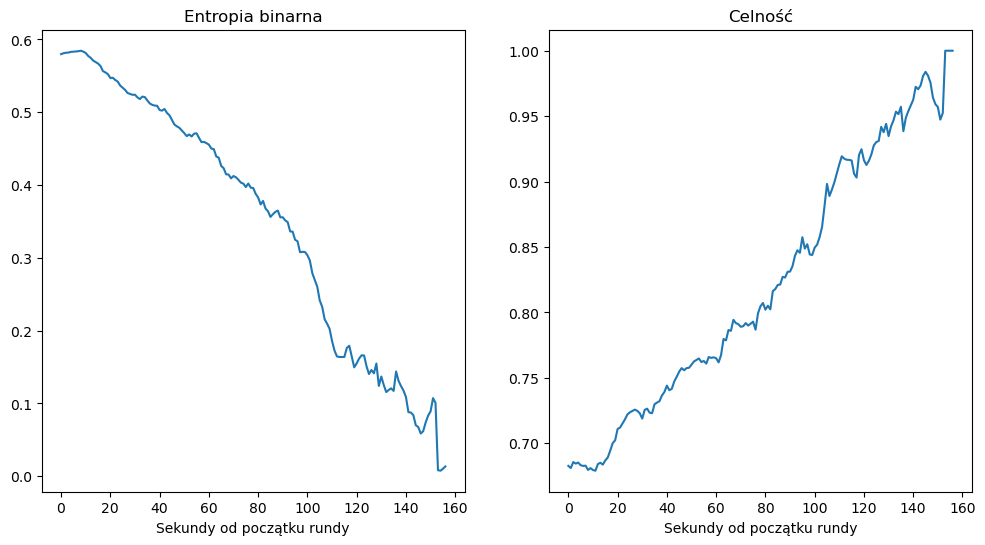

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
graph_df = test_all_variables[["new_seconds", "log_loss"]].copy()
graph_df["new_seconds"] = test_all_variables.new_seconds.round()
graph_df = graph_df.groupby(by='new_seconds').mean()
sns.lineplot(graph_df, x="new_seconds", y="log_loss", ax=axes[0])
axes[0].set_title("Entropia binarna")
axes[0].set_xlabel("Sekundy od początku rundy")
axes[0].set_ylabel("")

y_pred = (results_all["LGBM"] >= 0.5)
test_all_variables["accuracy"] = (test_all_variables['winningSideCT'] == y_pred)
graph_df = test_all_variables[["new_seconds", "accuracy"]].copy()
graph_df["new_seconds"] = test_all_variables.new_seconds.round()
graph_df = graph_df.groupby(by='new_seconds').mean()
sns.lineplot(graph_df, x="new_seconds", y="accuracy", ax=axes[1])
axes[1].set_title("Celność")
axes[1].set_xlabel("Sekundy od początku rundy")
axes[1].set_ylabel("")
plt.savefig("graphs/connected_log_acc.png")
plt.show()